# #TESTING

In [1]:
cd ..

c:\git\hwars


In [2]:
#dataset for test
from datasets import load_dataset

dataset = load_dataset("binitt/hwars-buttons", split="train")
dataset = dataset.train_test_split(test_size=0.1)
# model_name = "data/model/buttons/"
model_name = "binitt/hwars-buttons-model"

0: Detected button with confidence 0.922 at location [184.62, 1146.01, 366.12, 1276.16]
1: Detected button with confidence 0.853 at location [2273.52, 213.18, 2371.29, 308.99]
2: Detected button with confidence 0.981 at location [2158.91, 1215.68, 2385.11, 1316.75]


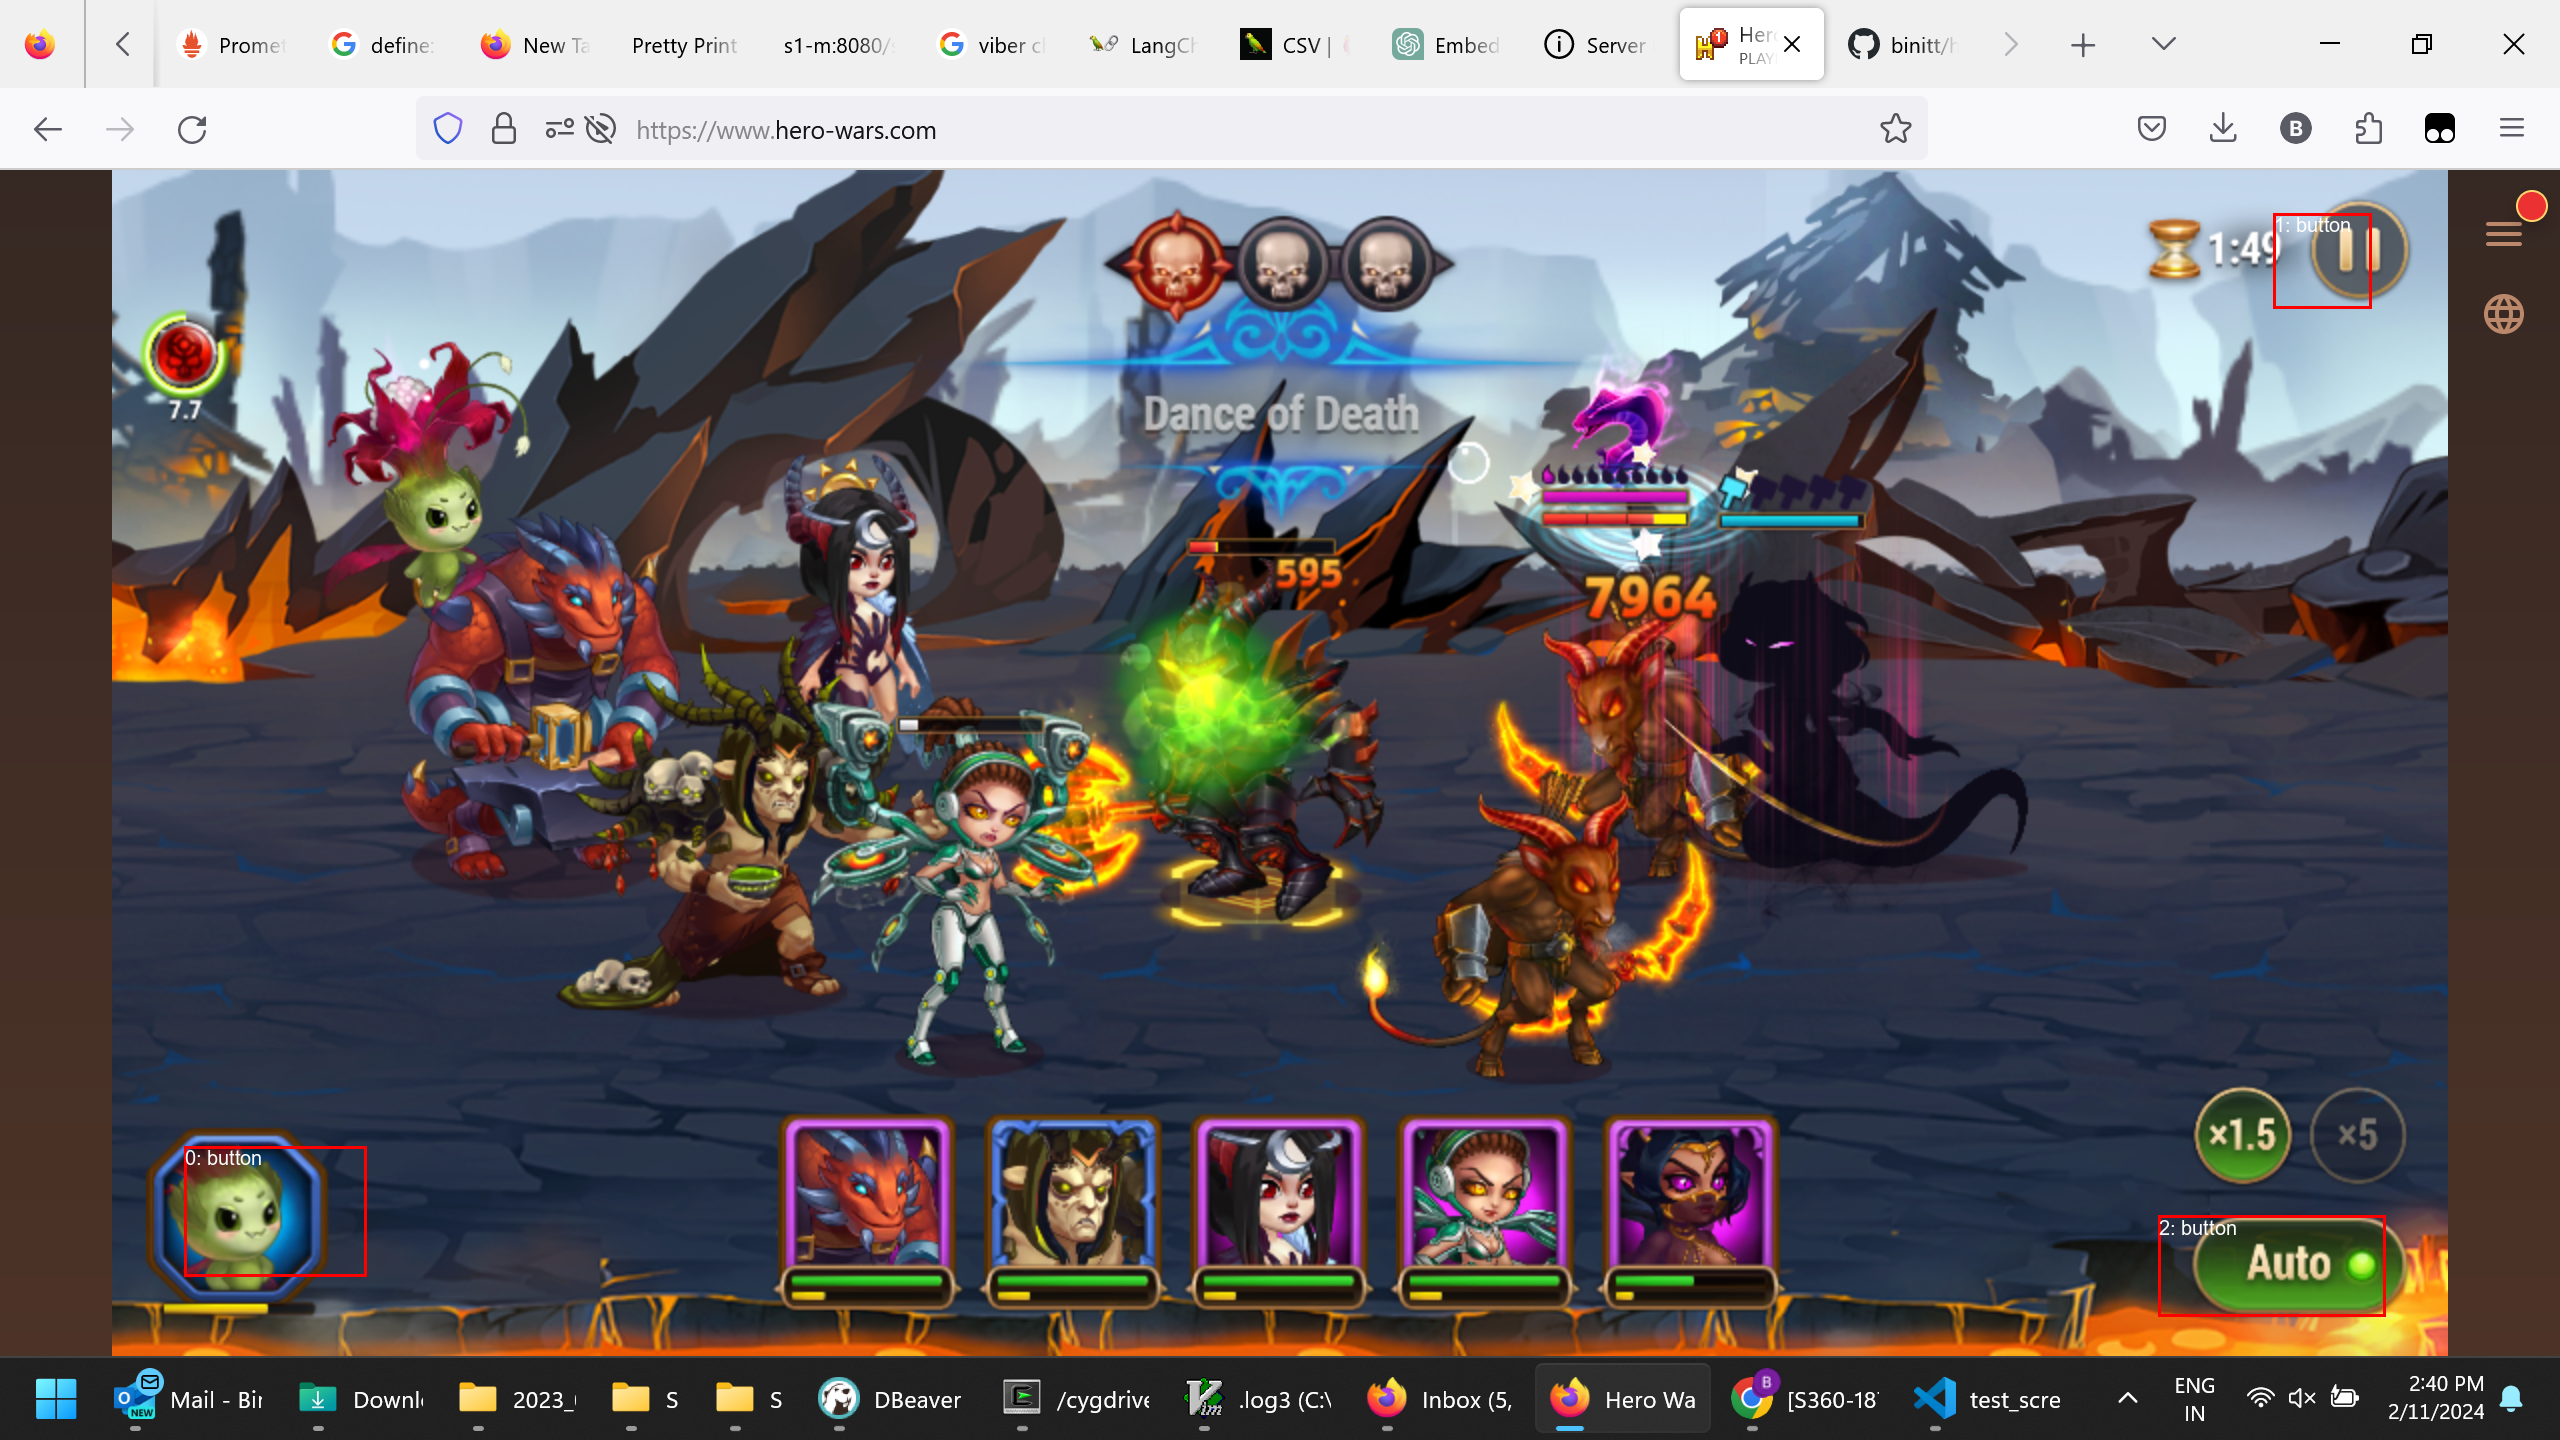

In [3]:
import torch
from transformers import AutoImageProcessor
from transformers import AutoModelForObjectDetection
from PIL import Image, ImageDraw, ImageFont

image_processor = AutoImageProcessor.from_pretrained(model_name)
model = AutoModelForObjectDetection.from_pretrained(model_name)

# f = open(r'data/buttons/ss-7-victory.png', "rb")
# image = Image.open(f)

image = dataset['test'][0]['image']
with torch.no_grad():
    inputs = image_processor(images=image, return_tensors="pt")
    outputs = model(**inputs)
    target_sizes = torch.tensor([image.size[::-1]])
    results = image_processor.post_process_object_detection(outputs, threshold=0.8, target_sizes=target_sizes)[0]

i = 0
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
        f"{i}: Detected {model.config.id2label[label.item()]} with confidence "
        f"{round(score.item(), 3)} at location {box}"
    )
    i += 1

draw = ImageDraw.Draw(image)
font = ImageFont.truetype("arial.ttf", 20)

i = 0
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    x, y, x2, y2 = tuple(box)
    draw.rectangle((x, y, x2, y2), outline="red", width=3)
    draw.text((x, y), f"{i}: {model.config.id2label[label.item()]}", fill="white", font=font)
    i += 1

image        

In [4]:
import json

from_file = r'data/buttons/metadata.jsonl'
with open(from_file, "r") as f:
    for line in f:
        obj = json.loads(line)
        print(f"Processing for {obj['file_name']}, {obj['objects']['bbox']}")
        

Processing for ss-1-find.png, [[1838, 313, 90, 84], [814, 1051, 229, 79], [1629, 746, 210, 76], [1631, 855, 210, 76], [1629, 962, 210, 76], [1626, 643, 210, 76]]
Processing for ss-2-start.png, [[1822, 324, 79, 76], [1571, 1049, 259, 95], [1122, 1223, 221, 68], [1370, 1223, 223, 74]]
Processing for ss-3-VIP.png, [[1149, 1117, 305, 93], [1931, 215, 82, 82]]
Processing for ss-4-tobattle.png, [[1746, 226, 87, 87], [1885, 1206, 253, 95]]
Processing for ss-5-battle-ongoing.png, [[2179, 1220, 234, 95], [2307, 202, 106, 103]]
Processing for ss-6-battle-ongoing.png, [[2309, 207, 101, 90], [2184, 1215, 223, 103]]
Processing for ss-7-victory.png, [[1569, 490, 196, 95], [910, 1149, 354, 98], [1302, 1155, 351, 90]]


In [5]:
results["boxes"]

tensor([[ 184.6155, 1146.0094,  366.1233, 1276.1559],
        [2273.5176,  213.1836, 2371.2881,  308.9881],
        [2158.9084, 1215.6812, 2385.1077, 1316.7545]])

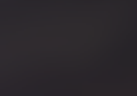

In [6]:
box = [round(i, 2) for i in results["boxes"][1].tolist()]
box[2] += 40
b1 = dataset['train'][1]['image'].crop(box)
b1.save('logs/b1.png')
b1

In [7]:

import numpy as np
image_path = 'logs/b1.png'
# image_path = 'data/buttons/ss-2-start.png'
import easyocr
import cv2

def gettext(b1):
    # Initialize the EasyOCR reader
    reader = easyocr.Reader(['en'])  # 'en' for English, you can specify other languages as well

    results = reader.readtext(np.array(b1))

    # # Convert RGB to BGR
    # open_cv_image = open_cv_image[:, :, ::-1].copy()
    # opencvImage = cv2.cvtColor(np.array(b1), cv2.COLOR_RGB2BGR)
    # results = reader.readtext(opencvImage)


    # results = reader.readtext(image_path)

    # Process the OCR results
    for result in results:
        # Extract the bounding box, text, and confidence
        bbox = result[0]
        text = result[1]
        confidence = result[2]

        # Print the extracted text and its confidence
        # print(f'Text: {text}, Confidence: {confidence}')

        # Print the bounding box coordinates
        # print(f'Bounding Box: {bbox}')
    return results[0][1]



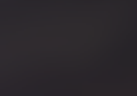

In [9]:
b1

In [8]:
print(f"Got text: {gettext(b1)}")

IndexError: list index out of range

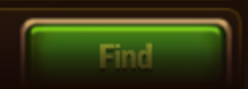

Text: Find, Confidence: 0.9444105872251766
Bounding Box: [[93, 39], [161, 39], [161, 75], [93, 75]]
Got text: Find


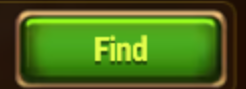

Text: Find , Confidence: 0.6813947615446398
Bounding Box: [[89, 31], [155, 31], [155, 67], [89, 67]]
Got text: Find 


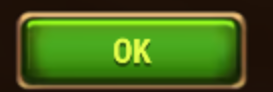

Text: OK, Confidence: 0.9797109701427045
Bounding Box: [[109, 35], [159, 35], [159, 71], [109, 71]]
Got text: OK


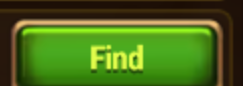

Text: Find , Confidence: 0.37861482912587885
Bounding Box: [[85, 41], [151, 41], [151, 77], [85, 77]]
Got text: Find 


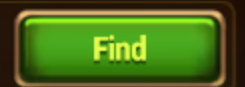

Text: Find , Confidence: 0.568931611276424
Bounding Box: [[87, 31], [153, 31], [153, 67], [87, 67]]
Got text: Find 


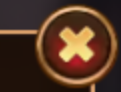

IndexError: list index out of range

In [29]:
from IPython.display import display

for box in results["boxes"]:
    box = [round(i, 2) for i in box.tolist()]
    box[2] += 40
    b1 = dataset['train'][1]['image'].crop(box)
    display(b1)
    print(f"Got text: {gettext(b1)}")

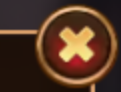

In [28]:
from IPython.display import display
display(b1)

In [39]:
import json
from_file = r'data/buttons/hwars.json'
with open(from_file, "r") as f:
    from_obj = json.load(f)

In [41]:
v0 = next(iter(from_obj['_via_img_metadata'].values()))

In [45]:
v0["regions"][0]['region_attributes']

{'text': 'X', 'type': 'cross'}